In [1]:
%pip install qiskit
%pip install quantum_simulation_recipe
%pip install matplotlib
%pip install numpy
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *
from time import sleep
from tqdm import tqdm

def Tensor_product(matrix,power):
    if power==0:
        return [[1]]
    else:
        j=1
        m=matrix
        while j<power:
            m=np.kron(m,matrix)
            j+=1
        return m


In [ ]:
# Model: 1D Heisenberg model
n=10
dim=2**n
J,h=1,1.2
t=.1
r=1
delta_t=t/r
order=2
hnn=Nearest_Neighbour_1d(n=n,Jx=J,Jy=J,Jz=J,hx=h,hy=0,hz=0,pbc=True)
h_list=hnn.ham_xyz
approx_U=pf(h_list,t=t,r=r,order=1)
exact_U=expH(hnn.ham,t=t)
#observables to be measured
Observables_with_different_BK=[]
i=0
while i<=n:
    paulis=Pauli('X'*i).to_matrix()
    projectures=Tensor_product([[1,0],[0,0]],n-i)
    observable=np.kron(paulis,projectures)
    Observables_with_different_BK.append(observable)
    i+=1  
#fixed initial state
Initial_state=Statevector.from_int(0,dim).data

Exact value: 0.8655873951876714, Approximate value: 0.8575709761781285, Error: 0.008016419009542863
Exact value: -1.3877787807814457e-17, Approximate value: -0.003237856549274748, Error: 0.003237856549274734
Exact value: 0.0, Approximate value: 5.8667344327151955e-05, Error: 5.8667344327151955e-05
Exact value: -2.6020852139652106e-18, Approximate value: -3.6495450309818184e-08, Error: 3.64954503072161e-08
Exact value: 0.0, Approximate value: 4.3416434932896236e-10, Error: 4.3416434932896236e-10
Exact value: 5.421010862427522e-20, Approximate value: 5.692061405548898e-19, Error: 5.149960319306146e-19
Exact value: 2.0328790734103208e-20, Approximate value: 8.267041565201971e-19, Error: 8.063753657860939e-19
Exact value: -3.3881317890172014e-21, Approximate value: 2.0633722595114756e-18, Error: 2.066760391300493e-18
Exact value: -4.235164736271502e-22, Approximate value: -3.451659260061274e-20, Error: 3.409307612698559e-20
Exact value: -4.235164736271502e-22, Approximate value: -1.3499587

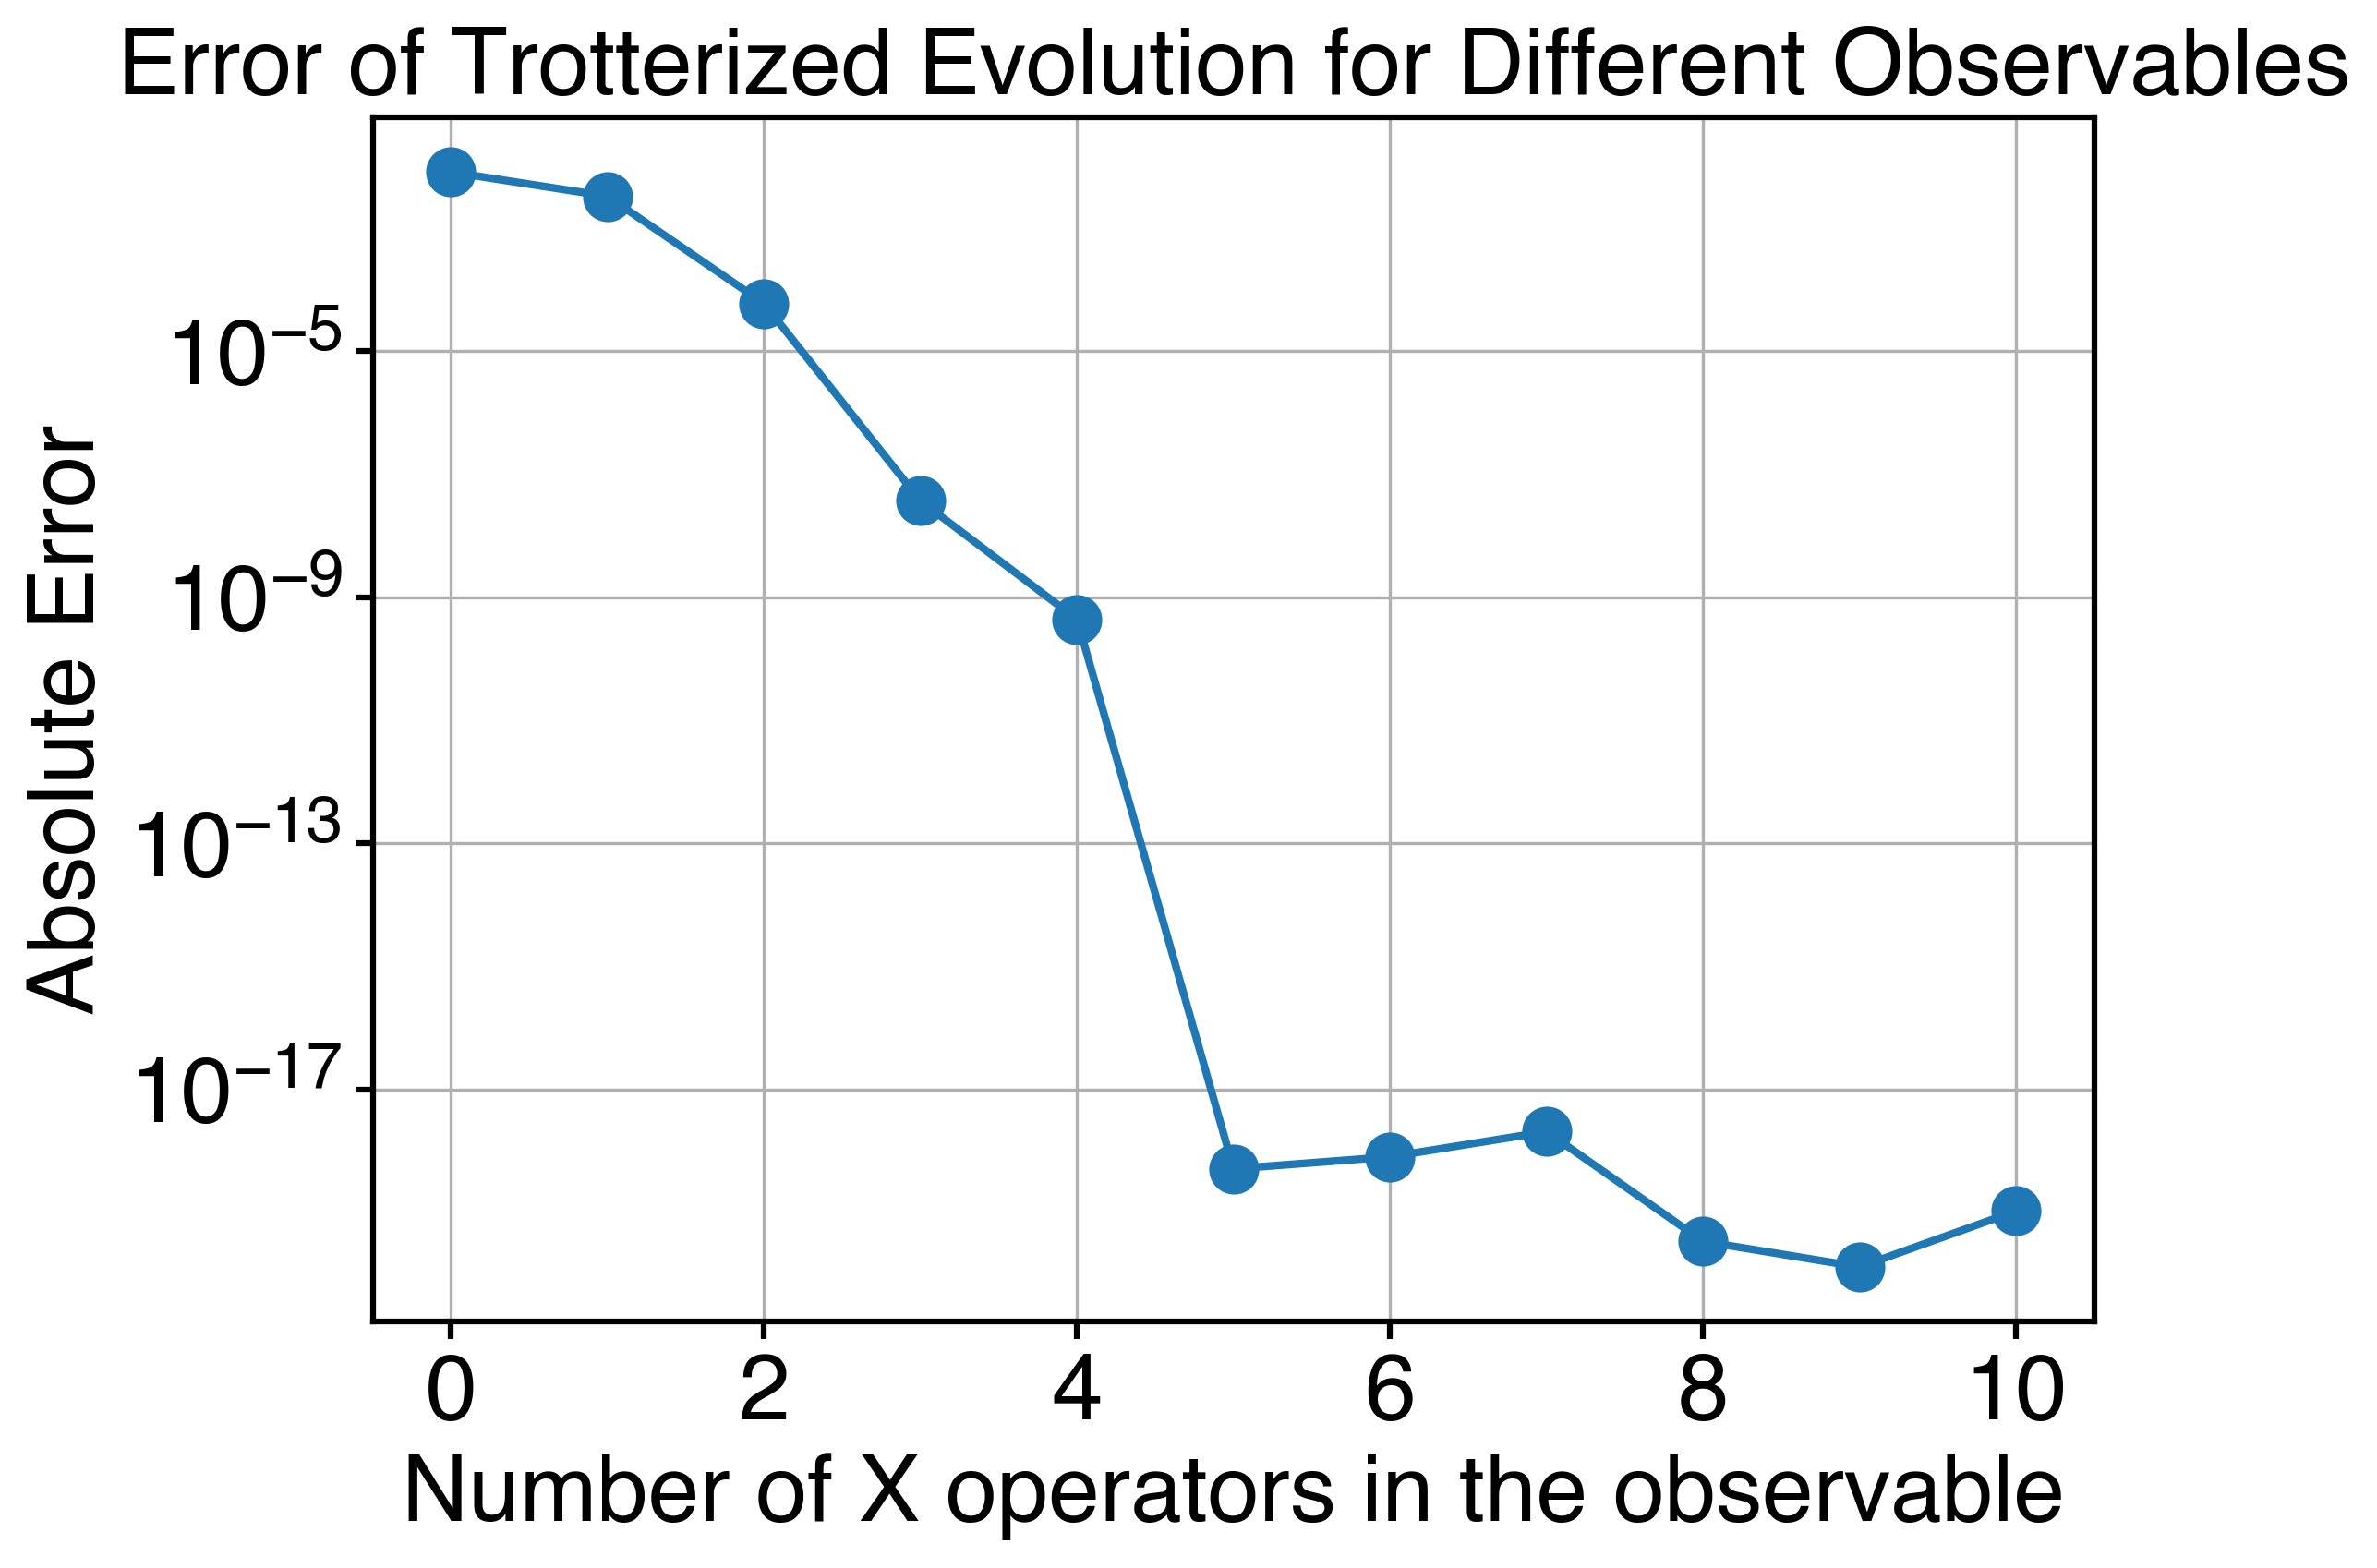

In [ ]:
errors=[]
for observable in  Observables_with_different_BK:
    exact_value=np.real(Statevector(exact_U@Initial_state).expectation_value(observable))
    approx_value=np.real(Statevector(approx_U@Initial_state).expectation_value(observable))
    print(f"Exact value: {exact_value}, Approximate value: {approx_value}, Error: {abs(exact_value-approx_value)}")
    errors.append(abs(exact_value-approx_value))
plt.figure(figsize=(8,6))
plt.plot(range(n+1), errors, marker='o')
plt.yscale('log')
plt.xlabel('Number of Paulis in Observable')
plt.ylabel('Absolute Error')
plt.title('Error of Trotterized Evolution for Different Observables')
plt.grid()
plt.show()